

# Py-ML-App (Like R_Shining??, Voila) to Predict Housing Price 
## Input:
    - Basic: Housing Datasets (as .csv)
    - Improvement Later: 1.House Key parameter Inputs (as.csv) OR App Input
                         2.House Address(as webinput, API/REST/BeautifulSoup find key parameters downloads)
                         3.Add year paraeter: When do you want to sale it? 
    
## ML-Algorithm: Try Decesion Tree Regressor, Random Forest Regressor, XGBoosting Reg
    -EDA and preporcessing
    -Validation
    -Tuning
    -Pipline
    
## Output:
    - Basic :Predict Price datasets (as.csv)-output.csv
    - Improvement Later:
                    1.Idea1: Put it on visusal
                    2.Input key attributes and predict pricing
                    3.Input address-> API/REST got attributes-> feed in model pipeline-> spit Price prediction 
    
 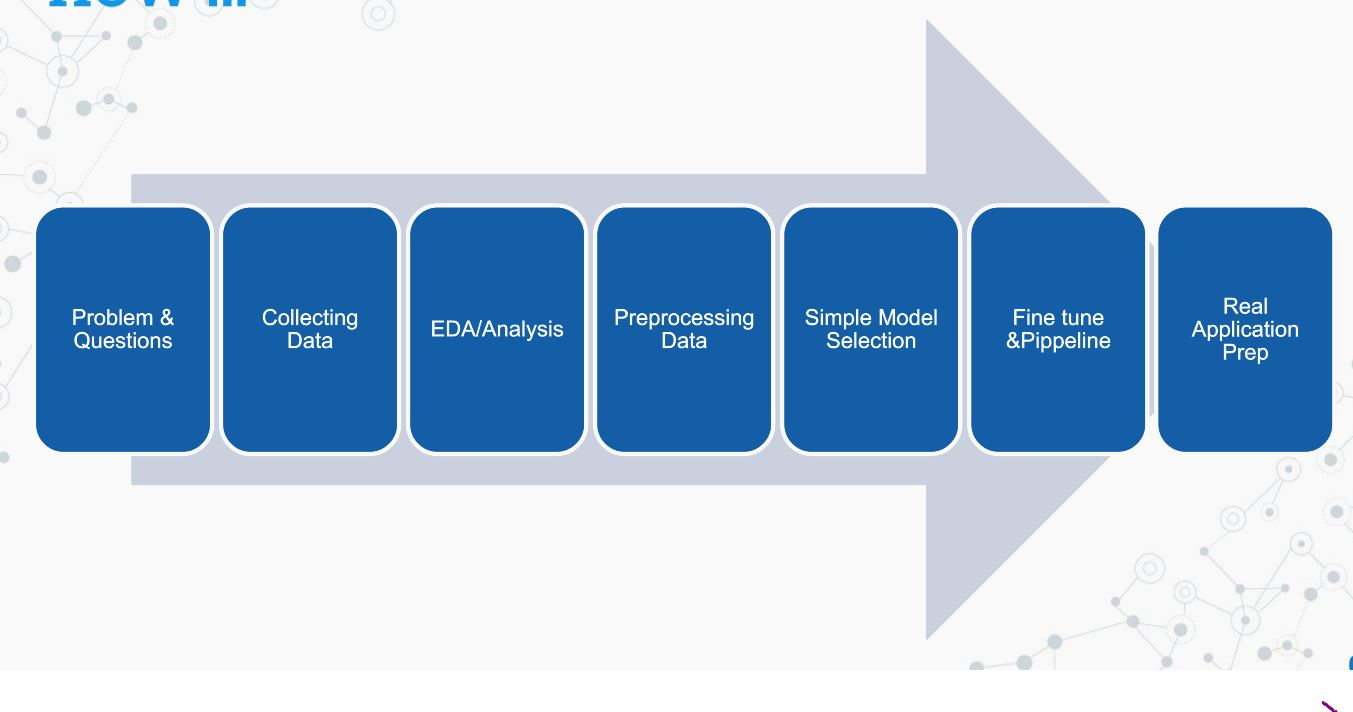
 
    Step1:Import
    Step2:EDA -Qualititive, Visual
    Step3:Preprocessing/Wraggling Impute Null,Categorical used most frequent and num use mean/media
    Step4:Preprocessing/Wraggling LabelEncoder/LabelEncoder/OneHotEncoder Category to Num, MinMaxScaler
    Step5:Choose Base Model/Feature/Parameters
    Step6:Build Best Model
    Step7:Fine Tuning
    Step8:Run Model on inputData and generate the Output file

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import matplotlib.pyplot as plt
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor #Model1(Simple Supervise Learning Decision Tree)
from sklearn.ensemble import RandomForestRegressor #Model2-Ensemble Learning (Bagging)
import xgboost as xgb #Model3--Ensemble Learning (Boosting)
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.pipeline import Pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout



import time

In [3]:
#Step1: 
# Path of the file to read


train = pd.read_csv('train.csv')
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [4]:
#Step2:EDA
train .columns
train .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2197 non-null   int64  
 1   PID              2197 non-null   int64  
 2   MS SubClass      2197 non-null   int64  
 3   MS Zoning        2197 non-null   object 
 4   Lot Frontage     1835 non-null   float64
 5   Lot Area         2197 non-null   int64  
 6   Street           2197 non-null   object 
 7   Alley            143 non-null    object 
 8   Lot Shape        2197 non-null   object 
 9   Land Contour     2197 non-null   object 
 10  Utilities        2197 non-null   object 
 11  Lot Config       2197 non-null   object 
 12  Land Slope       2197 non-null   object 
 13  Neighborhood     2197 non-null   object 
 14  Condition 1      2197 non-null   object 
 15  Condition 2      2197 non-null   object 
 16  Bldg Type        2197 non-null   object 
 17  House Style   

<AxesSubplot:>

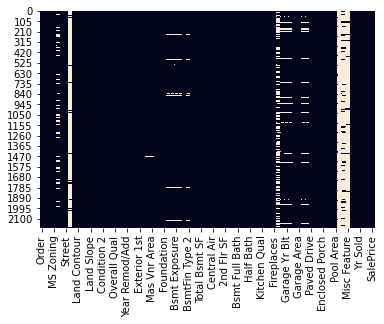

In [6]:
#Step2:EDA null
sns.heatmap(train.isnull(), cbar=False)

In [7]:
#Step3:Wraggling 1. null
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

Pool QC           99.453801
Misc Feature      96.358671
Alley             93.491124
Fence             80.928539
Fireplace Qu      48.520710
Lot Frontage      16.477014
Garage Yr Blt      5.553027
Garage Cond        5.553027
Garage Qual        5.553027
Garage Finish      5.553027
Garage Type        5.461994
Bsmt Exposure      3.140646
BsmtFin Type 2     3.095130
BsmtFin Type 1     3.049613
Bsmt Qual          3.049613
Bsmt Cond          3.049613
Mas Vnr Type       1.001365
Mas Vnr Area       1.001365
Garage Cars        0.045517
BsmtFin SF 2       0.045517
BsmtFin SF 1       0.045517
Bsmt Unf SF        0.045517
Total Bsmt SF      0.045517
Bsmt Full Bath     0.045517
Bsmt Half Bath     0.045517
Garage Area        0.045517
Electrical         0.045517
dtype: float64

In [8]:
#Step2:EDA. categorical--'float64','int64'

cat_dfTr=train.select_dtypes(include=['object']).copy()
cat_dfTr.head()
#dfTr['mobile_subscriptions'].value_counts()
for col_name in train.columns:
    if train[col_name].dtypes == 'object':
        unique_cat = len(train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'MS Zoning' has 7 unique categories
Feature 'Street' has 2 unique categories
Feature 'Alley' has 3 unique categories
Feature 'Lot Shape' has 4 unique categories
Feature 'Land Contour' has 4 unique categories
Feature 'Utilities' has 3 unique categories
Feature 'Lot Config' has 5 unique categories
Feature 'Land Slope' has 3 unique categories
Feature 'Neighborhood' has 28 unique categories
Feature 'Condition 1' has 9 unique categories
Feature 'Condition 2' has 8 unique categories
Feature 'Bldg Type' has 5 unique categories
Feature 'House Style' has 8 unique categories
Feature 'Roof Style' has 6 unique categories
Feature 'Roof Matl' has 8 unique categories
Feature 'Exterior 1st' has 16 unique categories
Feature 'Exterior 2nd' has 17 unique categories
Feature 'Mas Vnr Type' has 6 unique categories
Feature 'Exter Qual' has 4 unique categories
Feature 'Exter Cond' has 5 unique categories
Feature 'Foundation' has 6 unique categories
Feature 'Bsmt Qual' has 6 unique categories
Feature '

In [9]:
#Step2:EDA categorical
for name in train.select_dtypes(include=['object']):
    print(name,':')
    print(train[name].value_counts(),'\n')

MS Zoning :
RL         1704
RM          340
FV          113
C (all)      19
RH           17
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64 

Street :
Pave    2188
Grvl       9
Name: Street, dtype: int64 

Alley :
Grvl    87
Pave    56
Name: Alley, dtype: int64 

Lot Shape :
Reg    1389
IR1     737
IR2      60
IR3      11
Name: Lot Shape, dtype: int64 

Land Contour :
Lvl    1983
HLS      86
Bnk      84
Low      44
Name: Land Contour, dtype: int64 

Utilities :
AllPub    2194
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64 

Lot Config :
Inside     1597
Corner      376
CulDSac     142
FR2          70
FR3          12
Name: Lot Config, dtype: int64 

Land Slope :
Gtl    2091
Mod      93
Sev      13
Name: Land Slope, dtype: int64 

Neighborhood :
NAmes      324
CollgCr    212
OldTown    182
Edwards    149
Somerst    149
NridgHt    135
Gilbert    127
NWAmes     105
Sawyer      99
Mitchel     89
SawyerW     89
Crawfor     76
BrkSide     72
IDOTRR      70
Timber    

In [6]:
#Step2:EDA Outliner?
train.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2197.000000,2.197000e+03,2197.000000,1835.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2175.000000,...,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000
mean,1460.512517,7.127872e+08,57.064178,69.549319,10268.070096,6.116523,5.552572,1972.030951,1984.781065,105.101609,...,92.436959,48.768320,22.393719,2.361402,15.954028,2.789713,57.404188,6.189804,2007.793810,182376.851161
std,846.537251,1.887751e+08,42.360690,23.188224,7975.740885,1.429613,1.107019,30.450069,20.898245,184.897165,...,121.422842,69.127588,62.063281,22.843004,56.495484,39.991010,639.103790,2.746902,1.314345,81168.157405
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,13100.000000
25%,733.000000,5.284410e+08,20.000000,58.500000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,1452.000000,5.354532e+08,50.000000,69.000000,9488.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,2196.000000,9.071811e+08,70.000000,80.000000,11660.000000,7.000000,6.000000,2002.000000,2004.000000,166.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,2929.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,870.000000,742.000000,584.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000



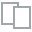
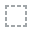
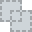
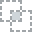
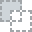
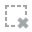
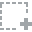
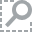
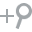
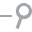
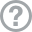
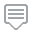
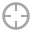
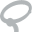
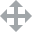
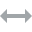
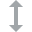
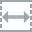
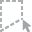
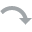
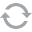
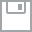
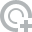
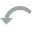
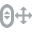
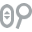
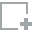
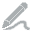
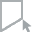
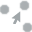
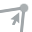
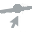

In [5]:
#Step2:EDA
#from dataprep.eda import plot, plot_correlation, create_report, plot_missing
plot(train)

In [13]:
#Step3:Preprocessing/Wraggling Impute Null,Categorical used most frequent and num use meaimputation.cs import fast_knn(very accurate)n 
#imp_mean=SimpleImputer(strategy='most_freqent'), or from impyute., datawig, CExpensive
#Can we old fashion NaN-Num with mean and NaN-Num with most frequent value? 
for col in train.columns:
    # Check if the column is of object type
    if train[col].dtype == 'object':
        # Impute with the most frequent value
        train = train.fillna(train[col].value_counts().index[0])
    else:
        train.fillna(train.mean(), inplace=True)
train.isnull().sum().sort_values(ascending=False)

SalePrice        0
Year Built       0
Roof Style       0
Roof Matl        0
Exterior 1st     0
                ..
TotRms AbvGrd    0
Functional       0
Fireplaces       0
Fireplace Qu     0
Order            0
Length: 82, dtype: int64

In [14]:
#Step4:Preprocessing/Wraggling Encodeing/Labelcoding/OneHotcoding Category to Num
class_le = LabelEncoder()
#fTr[object_cols] =class_le.fit_transform(dfTr[object_cols].values)
#fTest[object_cols] =class_le.fit_transform(dfTest[object_cols].values)

for col in train.columns:
    if train[col].dtype=='object':
        train[col]=class_le.fit_transform(train[col])

train.tail(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2177,563,532378180,20,5,65.000000,7150,1,2,3,3,...,0,3,4,3,0,10,2009,9,4,123000
2178,2447,528327010,60,5,69.549319,9233,1,2,0,3,...,0,3,4,3,0,3,2006,9,4,405000
2179,669,535402270,20,5,77.000000,11500,1,2,0,3,...,0,3,2,3,0,5,2009,9,4,163000
2180,253,906385020,20,5,64.000000,7360,1,2,3,3,...,0,3,4,3,0,3,2010,9,4,187000
2181,2517,533250130,120,5,30.000000,9549,1,2,0,3,...,0,3,4,3,0,4,2006,9,4,270000
2182,358,527163070,60,5,69.549319,9765,1,2,1,3,...,0,3,4,4,480,4,2009,9,4,185000
2183,1279,535456070,50,5,60.000000,7200,1,2,3,3,...,0,3,4,3,0,3,2008,9,4,150000
2184,1301,902201140,20,6,100.000000,12000,1,2,3,3,...,0,3,1,3,0,5,2008,9,4,147000
2185,1203,534252090,85,5,69.549319,12122,1,2,0,3,...,0,3,4,3,0,7,2008,9,4,178400
2186,2557,534451130,30,5,52.000000,5825,1,2,0,3,...,0,3,4,3,0,6,2006,9,4,79900


In [15]:
train.describe()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2197.000000,2.197000e+03,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,...,2197.000000,2197.000000,2197.000000,2197.00000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000,2197.000000
mean,1460.512517,7.127872e+08,57.064178,4.951752,69.549319,10268.070096,0.995904,1.895312,1.934001,2.786982,...,2.789713,2.991807,3.512517,3.02822,57.404188,6.189804,2007.793810,8.360036,3.794720,182376.851161
std,846.537251,1.887751e+08,42.360690,0.887806,21.190977,7975.740885,0.063887,0.415940,1.413478,0.689601,...,39.991010,0.150670,1.066740,0.21152,639.103790,2.746902,1.314345,1.862071,1.057202,81168.157405
min,1.000000,5.263011e+08,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2006.000000,0.000000,0.000000,13100.000000
25%,733.000000,5.284410e+08,20.000000,5.000000,60.000000,7500.000000,1.000000,2.000000,0.000000,3.000000,...,0.000000,3.000000,4.000000,3.00000,0.000000,4.000000,2007.000000,9.000000,4.000000,130000.000000
50%,1452.000000,5.354532e+08,50.000000,5.000000,69.549319,9488.000000,1.000000,2.000000,3.000000,3.000000,...,0.000000,3.000000,4.000000,3.00000,0.000000,6.000000,2008.000000,9.000000,4.000000,163500.000000
75%,2196.000000,9.071811e+08,70.000000,5.000000,79.000000,11660.000000,1.000000,2.000000,3.000000,3.000000,...,0.000000,3.000000,4.000000,3.00000,0.000000,8.000000,2009.000000,9.000000,4.000000,215000.000000
max,2929.000000,1.007100e+09,190.000000,6.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,...,800.000000,4.000000,4.000000,5.00000,17000.000000,12.000000,2010.000000,9.000000,5.000000,755000.000000


In [16]:
#Step5:Choose Base Model/Feature/Parameters -Feature correlation
df_num_corr = train.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))


There is 26 strongly correlated values with SalePrice:
Overall Qual      0.799928
Gr Liv Area       0.699675
Garage Cars       0.644069
Garage Area       0.637406
Total Bsmt SF     0.629031
1st Flr SF        0.619164
Year Built        0.559975
Full Bath         0.547815
Year Remod/Add    0.531341
Mas Vnr Area      0.510983
Garage Yr Blt     0.501492
TotRms AbvGrd     0.486375
Fireplaces        0.485029
BsmtFin SF 1      0.439838
Foundation        0.397473
Lot Frontage      0.345279
Wood Deck SF      0.343644
Open Porch SF     0.320682
Fireplace Qu     -0.302485
Bsmt Exposure    -0.334825
Heating QC       -0.419510
Garage Type      -0.420956
Garage Finish    -0.510793
Bsmt Qual        -0.586718
Kitchen Qual     -0.616235
Exter Qual       -0.649305
Name: SalePrice, dtype: float64


[09:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


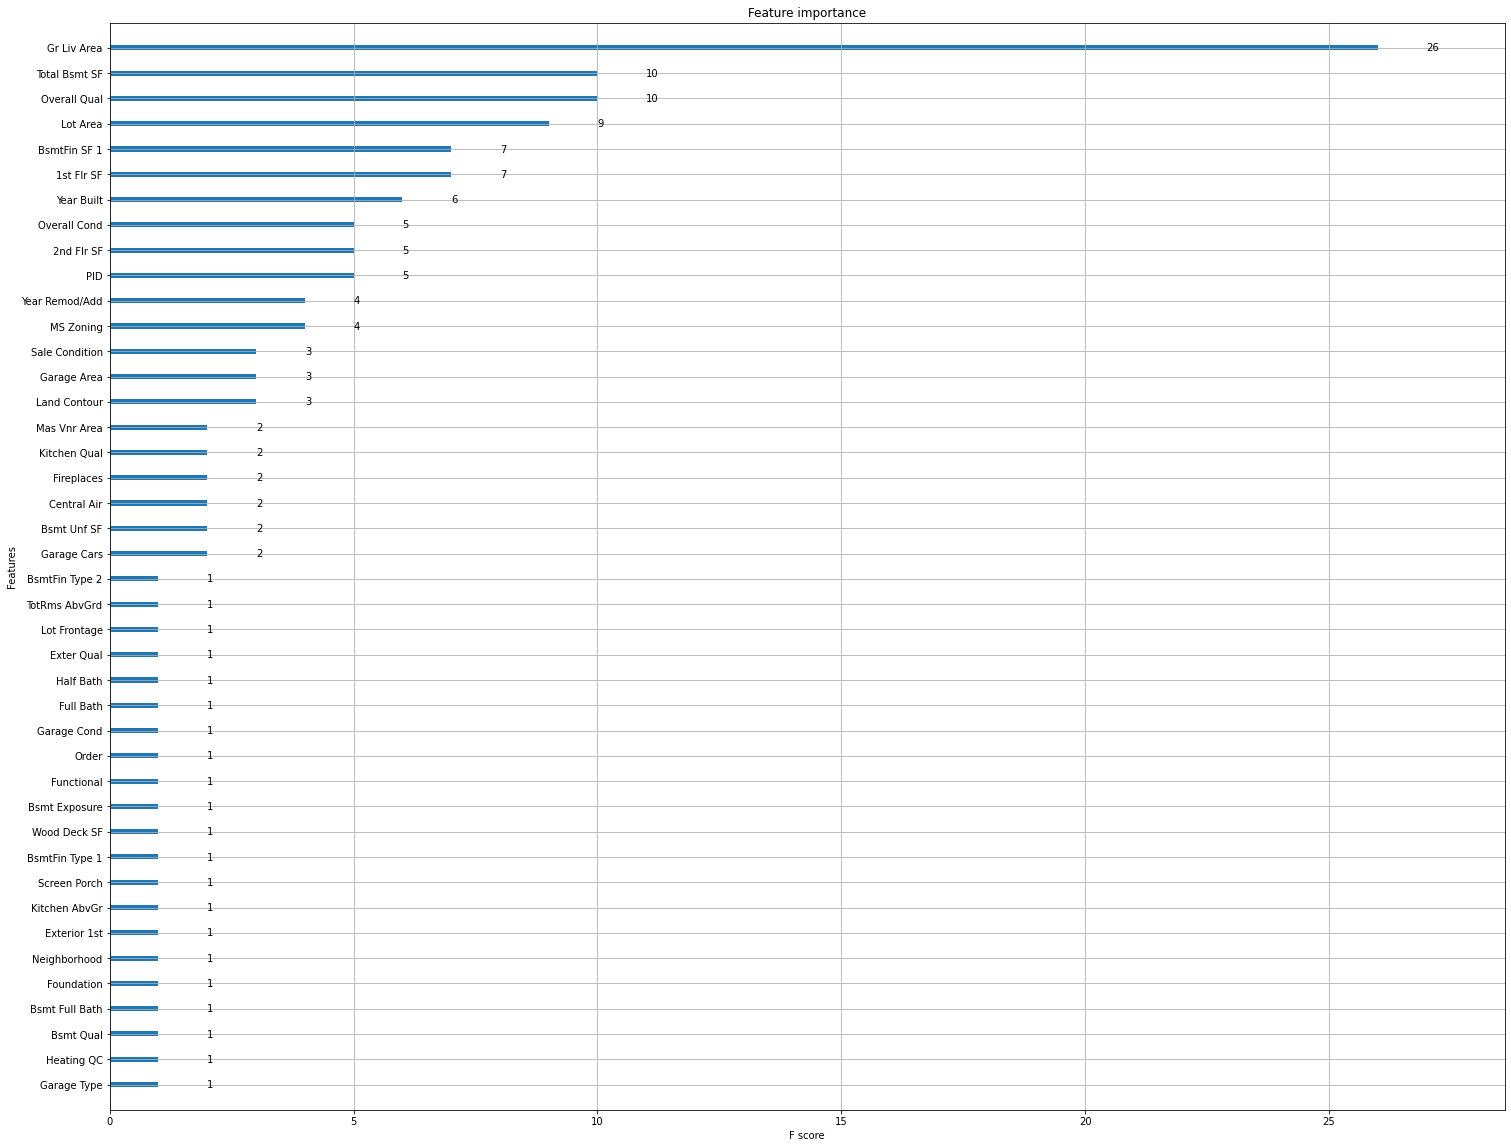

In [18]:
#Step5:Choose Base Model/Feature/Parameters -Feature Can other 2 tell us the similar golden list:
#feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
X=train.iloc[:,:-1]
y=train['SalePrice']
#import ggplot2 as plt
#EDA What feature arae most important in my dataset
# Create the DMatrix: housing_dmatrix 
df_dmatrix = xgb.DMatrix(data=X, label=y) 

# Create the parameter dictionary: params 
params = {"objective":"reg:linear", "max_depth":4} 

# Train the model: xg_reg 
xg_reg = xgb.train(params=params, dtrain=df_dmatrix, num_boost_round=10) 

# Plot the feature importances 
xgb.plot_importance(xg_reg) 
plt.rcParams["figure.figsize"] = (30, 25)
plt.show()


In [19]:
#Step6:Build Best/Base Model
c=list(golden_features_list.index)
y=train['SalePrice']
X=train[c]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)



In [20]:
#Step6-1 Baseline checking
models_list = []
models_list.append(('LM', linear_model.LinearRegression()))
models_list.append(('RFR', RandomForestRegressor())) 
models_list.append(('GBR', GradientBoostingRegressor()))
models_list.append(('XGB', xgb.XGBRegressor()))


In [21]:
#Step3-1 Baseline checking-Choosing Model
num_folds = 10
results = []
names = []

for name, model in models_list:

    start = time.time()
    model.fit(X_train, y_train)
    cv_results = model.score(X_test, y_test)
    #rmse=np.sqrt(np.abs(model.best_score_))
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (STD: %f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

LM: 0.708337 (STD: 0.000000) (run time: 0.341458)
RFR: 0.876532 (STD: 0.000000) (run time: 3.630118)
GBR: 0.905877 (STD: 0.000000) (run time: 0.959783)
XGB: 0.909883 (STD: 0.000000) (run time: 0.920183)


In [22]:
#Step6-2 Baseline checking-Choosing Model- Scaled)

import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledLM', Pipeline([('Scaler', StandardScaler()),('LM',
                                                                        linear_model.LinearRegression())])))
pipelines.append(('ScaledRGR', Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor( ))])))
pipelines.append(('ScaledGBR', Pipeline([('Scaler', StandardScaler()),('GBR',
                                                                      GradientBoostingRegressor())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB',
                                                                       xgb.XGBRegressor())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        model.fit(X_train, y_train)
        cv_results = model.score(X_test, y_test)
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledLM: 0.708337 (0.000000) (run time: -16.563443)
ScaledRGR: 0.861407 (0.000000) (run time: -16.596938)
ScaledGBR: 0.908699 (0.000000) (run time: -20.089478)
ScaledXGB: 0.909695 (0.000000) (run time: -21.101275)


In [25]:
#Step 7 Choose model and fine tuning 
#Fine Tuning XGBoosting Model
# Create the parameter grid: gbm_param_grid 

gbm_param_grid = { 

    'colsample_bytree': [0.3, 0.7], 

    'n_estimators': [25,50], 

    'max_depth': [2,5] 

} 

# Instantiate the regressor: gbm 

gbm =xgb.XGBRegressor() 

# Perform grid search: grid_mse 

grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid,scoring="neg_mean_squared_error",cv=5,verbose=1) 

# Fit grid_mse to the data 

grid_mse.fit(X_train, y_train) 

gbm.fit(X_train, y_train)

# Print the best parameters and lowest RMSE 

print("Best parameters found: ", grid_mse.best_params_) 

print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_))) 

print("Score:",gbm.score(X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    6.0s finished


Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 2, 'n_estimators': 50}
Lowest RMSE found:  28927.196344145294
Score: 0.9098832034127919


In [31]:
#Step6,7 Final Model
m=xgb.XGBRegressor(colsample_bytree= 0.7, max_depth=2,n_estimators=50) 
m.fit(X_train, y_train)
y_pred=m.predict(X_test)
print(r2_score(y_test,y_pred))


0.898838543760315


In [32]:
#Step8:Run Model on inputData and generate the output file
#Suppose get .csv files
t = pd.read_csv('test.csv')
t.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2006,New,Partial
3,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,New,Partial
4,2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,NaN,0,7,2006,WD,Normal


In [104]:
#Step8:Run Model on inputData and generate the Output file -1.Null
for col in t.columns:
    # Check if the column is of object type
    if t[col].dtype == 'object':
        # Impute with the most frequent value
        t = t.fillna(t[col].value_counts().index[0])
    else:
        t.fillna(t.mean(), inplace=True)
t.isnull().sum().sort_values(ascending=False)

Sale Condition    0
Total Bsmt SF     0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
                 ..
Kitchen Qual      0
TotRms AbvGrd     0
Functional        0
Fireplaces        0
Order             0
Length: 81, dtype: int64

In [106]:
#Step8:Run Model on inputData and generate the Submission file -2.Encoder
class_le = LabelEncoder()

for col in t.columns:
    if t[col].dtype=='object':
       t[col]=class_le.fit_transform(t[col])

t.tail(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
713,1400,905352030,60,3,83.000000,10005,1,2,3,3,...,0,0,0,4,2,0,3,2008,8,4
714,636,535175050,20,3,66.000000,12400,1,2,0,3,...,234,0,0,4,2,0,6,2009,8,4
715,255,906425045,50,3,82.000000,14235,1,2,0,3,...,0,0,0,4,2,0,3,2010,8,4
716,2071,905228020,20,3,68.239669,9000,1,2,3,3,...,0,0,0,4,2,0,5,2007,8,4
717,1920,535152060,20,3,70.000000,8176,1,2,3,3,...,0,0,0,4,2,0,8,2007,8,4
718,1632,527182040,120,3,68.239669,3696,1,2,3,3,...,0,0,0,4,2,0,10,2007,8,4
719,192,903204040,50,4,53.000000,5830,1,2,3,3,...,0,0,0,2,2,0,3,2010,8,4
720,1358,903427090,70,4,68.239669,5100,1,0,3,3,...,0,0,0,2,2,0,6,2008,8,4
721,2039,903458020,75,4,60.000000,7200,1,2,3,3,...,0,0,0,4,2,0,3,2007,8,4
722,1146,531450090,20,3,68.239669,7153,1,2,3,3,...,0,0,0,1,2,0,6,2008,8,4


In [111]:
#Step8:Run Model on inputData and generate the Submission file -3.Scale
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_test = scaler.fit_transform(t)

In [118]:
#Step8:Run Model on inputData and generate the Submission file -5.Model generate Prediction
X=t[c]
tar=pd.read_csv('target.csv')
tar.head()


,Order,SalePrice
0,2127,123600
1,193,209500
2,2407,202665
3,46,224000
4,2478,187000


In [120]:
#Step8:Run Model on inputData and generate the Submission file -6.Generate file
pred=m.predict(X)
print(r2_score(tar['SalePrice'],pred))

0.8957951759253735


In [121]:
d = {'Order': tar['Order'], 'SalePrice': pred}
output_df = pd.DataFrame(data=d)
#output_df.head()
#Final Steps-2
output_df.to_csv('output.csv',index=False)

,Order,SalePrice
0,2127,118255.648438
1,193,191489.546875
2,2407,188399.500000
3,46,212662.281250
4,2478,187240.359375
